# DS105 L8 P6 Hands on Helper

This example is similar to the hands-on assignment but works with a different dataset.

For the hands-on assignment, be sure you're working with the heart attack dataset.

In [2]:
install.packages("vembedr")
library("vembedr")
embed_vimeo("645345499")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmppNyKhx/downloaded_packages


Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/645345499

In [1]:
install.packages("mvnormtest")
install.packages("car")
install.packages("plyr")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp29RVAF/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp29RVAF/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp29RVAF/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp29RVAF/downloaded_packages


In [2]:
library("mvnormtest")
library("car")
library("plyr")
library("ggplot2")

Loading required package: carData



In [3]:
data <- read.csv("../Data/hockey1.csv")

In [4]:
head(data)

,ID,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim
,<dbl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,20120302213,2012030221,3,away,FALSE,OT,John Tortorella,2,35,44,8
2,20120302216,2012030221,6,home,TRUE,OT,Claude Julien,3,48,51,6
3,20120302223,2012030222,3,away,FALSE,REG,John Tortorella,2,37,33,11
4,20120302226,2012030222,6,home,TRUE,REG,Claude Julien,5,32,36,19
5,20120302236,2012030223,6,away,TRUE,REG,Claude Julien,2,34,28,6
6,20120302233,2012030223,3,home,FALSE,REG,John Tortorella,1,24,37,2


### independent variable is home or away
### dependent variables are goals and hits

In [5]:
data$goals <- as.numeric(data$goals)
data$hits <- as.numeric(data$hits)

In [6]:
data$HoAFactor <- as.factor(data$HoA)

In [7]:
head(data)

,ID,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,HoAFactor
,<dbl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<fct>
1,20120302213,2012030221,3,away,FALSE,OT,John Tortorella,2,35,44,8,away
2,20120302216,2012030221,6,home,TRUE,OT,Claude Julien,3,48,51,6,home
3,20120302223,2012030222,3,away,FALSE,REG,John Tortorella,2,37,33,11,away
4,20120302226,2012030222,6,home,TRUE,REG,Claude Julien,5,32,36,19,home
5,20120302236,2012030223,6,away,TRUE,REG,Claude Julien,2,34,28,6,away
6,20120302233,2012030223,3,home,FALSE,REG,John Tortorella,1,24,37,2,home


In [8]:
#feature selection
keeps <- c("HoAFactor", "goals", "hits")
data <- data[keeps]

In [9]:
#assumption sample size
count(data, "HoAFactor") #assumption NOT violated

HoAFactor,freq
<fct>,<int>
away,7441
home,7441


In [10]:
#feature selection for shapiro test
keeps1 <- c("goals", "hits")
data1 <- data[keeps1]

In [11]:
#multivariate normality
# NOTE: we must limit this to top 5000 rows 
mshapiro.test(t(data1[1:5000,]))  #violates this assumption, p < .05


	Shapiro-Wilk normality test

data:  Z
W = 0.97663, p-value < 2.2e-16


In [12]:
#Homogeneity of Variance
leveneTest(goals ~ HoAFactor, data=data) # Violates
leveneTest(hits ~ HoAFactor, data=data)  # Violates

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,12.58116,0.0003908537
,14880,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,12.67251,0.0003722286
,14880,NA,NA


In [13]:
#Absence of Multicollinearity
cor.test(data$goals, data$hits, method="pearson", use="complete.obs") #below .7, no strong multicollinearity


	Pearson's product-moment correlation

data:  data$goals and data$hits
t = -10.449, df = 14880, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.10127394 -0.06937475
sample estimates:
        cor 
-0.08534622 


In [14]:
#MANOVA
MANOVA <- manova(cbind(goals, hits) ~ HoAFactor, data = data)

In [15]:
summary(MANOVA)

             Df   Pillai approx F num Df den Df    Pr(>F)    
HoAFactor     1 0.014553   109.87      2  14879 < 2.2e-16 ***
Residuals 14880                                              
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [16]:
summary.aov(MANOVA, test = "wilks") 

 Response goals :
               Df Sum Sq Mean Sq F value    Pr(>F)    
HoAFactor       1    271 271.206  104.02 < 2.2e-16 ***
Residuals   14880  38796   2.607                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response hits :
               Df  Sum Sq Mean Sq F value    Pr(>F)    
HoAFactor       1    7393  7392.8  95.392 < 2.2e-16 ***
Residuals   14880 1153181    77.5                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
#There is a significant difference in goals and hits in relation to having home ice.

In [17]:
head(data)

,HoAFactor,goals,hits
,<fct>,<dbl>,<dbl>
1,away,2,44
2,home,3,51
3,away,2,33
4,home,5,36
5,away,2,28
6,home,1,37


In [18]:
aggregate(goals ~ HoAFactor, data, mean)
aggregate(goals ~ HoAFactor, data, sum)

HoAFactor,goals
<fct>,<dbl>
away,2.585405
home,2.855396


HoAFactor,goals
<fct>,<dbl>
away,19238
home,21247


In [19]:
aggregate(hits ~ HoAFactor, data, mean)
aggregate(hits ~ HoAFactor, data, sum)

HoAFactor,hits
<fct>,<dbl>
away,23.11732
home,24.52695


HoAFactor,hits
<fct>,<dbl>
away,172016
home,182505


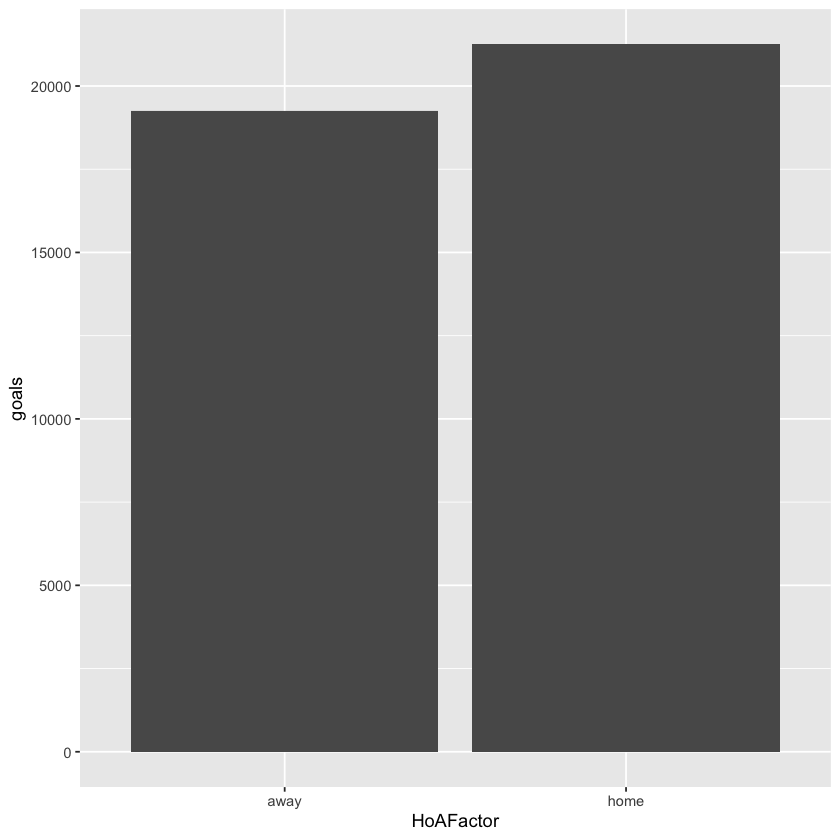

In [20]:
ggplot(data, aes(x=HoAFactor, y=goals)) + geom_bar(stat="identity")

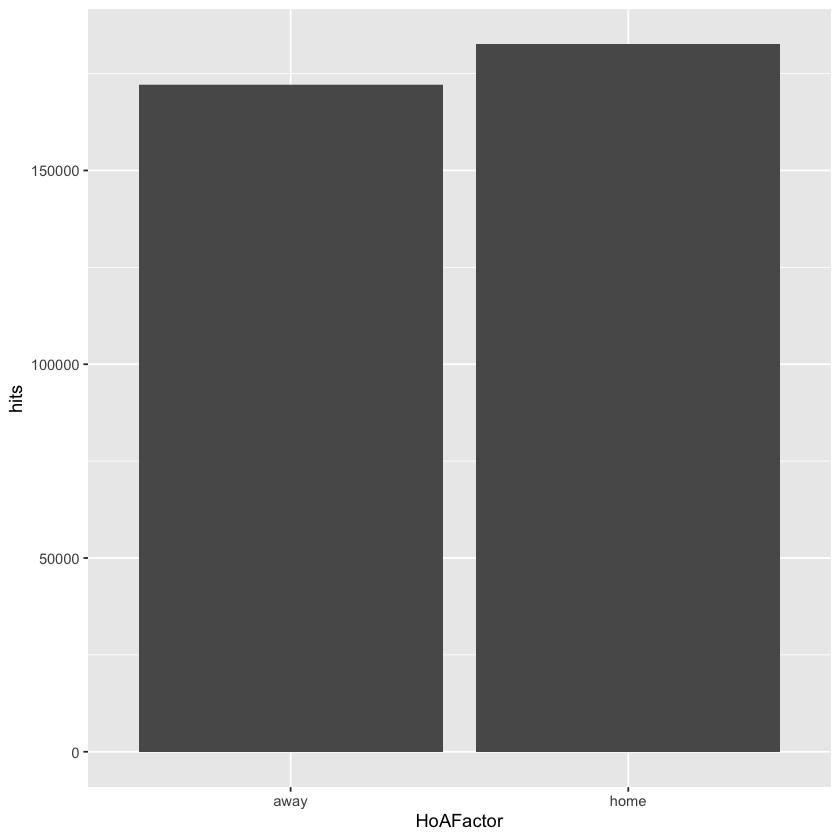

In [21]:
ggplot(data, aes(x=HoAFactor, y=hits)) + geom_bar(stat="identity")